# sr-oracle

Evaluate several oracular schemes for set-localization / speculative replacement.

2/26/2024

In [1]:
from collections import defaultdict
from importlib import reload
import json
import os
import sys
from typing import Dict, List, Optional

from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot
from naboo_utils import table, file

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200_mockingjay"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
]
dpi = 192

In [3]:
studies = {
    "sr_oracle": collate.StudyCollator(sim_dir, "sr_oracle",
                                       baseline_study=baseline_study,
                                       baseline_experiment=baseline_experiment,
                                       weights_path=weights_path),
    # TODO: Rename experiments in sr_oracle_nocold and merge with sr_oracle.
    "sr_oracle_nocold": collate.StudyCollator(sim_dir, "sr_oracle_nocold",
                                              baseline_study=baseline_study,
                                              baseline_experiment=baseline_experiment,
                                              weights_path=weights_path),
    "perfect": collate.StudyCollator(sim_dir, "perfect",
                                     baseline_study=baseline_study,
                                     baseline_experiment=baseline_experiment,
                                     weights_path=weights_path)
}

~~~ sr_oracle ~~~


[ipykernel_launcher][angrist-3] Reading study files:  44%|████▎     | 509/1164 [00:03<00:02, 238.59file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200_mockingjay/sr_oracle/sr_oracle_global_set_2/nutch/nutch_phase0: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1164/1164 [00:05<00:00, 194.87file/s]


[ipykernel_launcher][angrist-3] Collating study files...

~~~ sr_oracle_nocold ~~~


[ipykernel_launcher][angrist-3] Reading study files:  33%|███▎      | 379/1164 [00:02<00:03, 216.80file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200_mockingjay/sr_oracle_nocold/sr_oracle_pc_cache_3/pr/pr: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files:  43%|████▎     | 499/1164 [00:03<00:02, 223.55file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200_mockingjay/sr_oracle_nocold/sr_oracle_pc_set_1/pr/pr: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files:  88%|████████▊ | 1022/1164 [00:05<00:00, 222.13file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200_mockingjay/sr_oracle_nocold/sr_oracle_global_cache_3/pr/pr: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1164/1164 [00:06<00:00, 186.40file/s]


[ipykernel_launcher][angrist-3] Collating study files...

~~~ perfect ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 194/194 [00:01<00:00, 101.90file/s]


[ipykernel_launcher][angrist-3] Collating study files...



# Stream
## Access, all misses

In [4]:
stream_df = {
    # Single global stream
    "Global": studies["sr_oracle"]["sr_oracle_global_cache_1"],
    # PC-localized stream
    "PC": studies["sr_oracle"]["sr_oracle_pc_cache_1"],
    # Set-localized stream
    "Set": studies["sr_oracle"]["sr_oracle_global_set_1"],
    # PC+Set-localized stream
    "PC+Set": studies["sr_oracle"]["sr_oracle_pc_set_1"],
    # Perfect
    # "Perfect": studies["perfect"]["llc_perfect"],
}

stream_colors = defaultdict(lambda: None, {
    "Global": colormaps["Greens"](0.45),
    "PC": colormaps["Blues"](0.45),
    "Set": colormaps["Oranges"](0.45),
    "PC+Set": colormaps["Purples"](0.45),
    "Perfect": colormaps["Reds"](0.45),
})

stream_hatches = defaultdict(lambda: None, {})
stream_legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
stream_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [5]:
plot.get_suite_table(
    stream_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Global,7.555924,6.402370,6.311517,8.907309,7.289135
PC,24.272372,16.864417,16.618294,16.108039,18.419021
Set,23.549220,11.683397,18.465327,18.009663,17.851296
PC+Set,13.800009,0.578800,1.518329,14.763002,7.460480


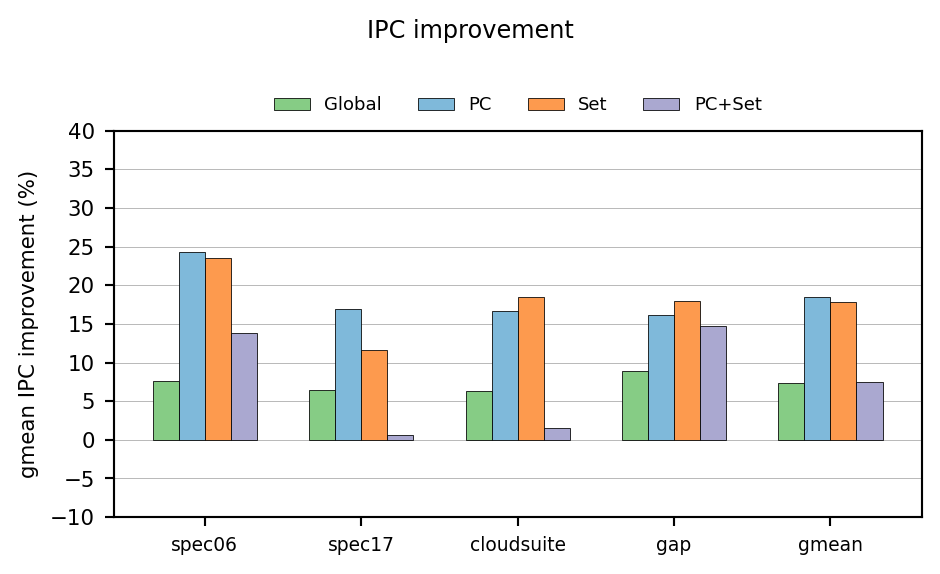

In [40]:
plot.plot_suite_statistic(
    stream_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-10, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("stream/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [8]:
plot.get_benchmark_table(stream_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Global,3.949441,10.443913,1.725694,1.381386,14.936233,-1.034393,-0.061229,19.043979,18.637315,-0.469869,16.551049,11.536966,6.980290,5.842962,7.078642,7.555924
PC,30.114007,16.213667,13.345422,21.736369,25.956744,32.590235,8.451543,19.065164,41.966335,31.665617,49.348601,35.411547,18.015224,16.728833,11.129414,24.272372
Set,49.216271,15.802372,34.065439,9.532410,30.145890,-8.273087,-0.551142,41.170261,93.990303,15.589667,31.071941,33.866505,12.175845,11.006625,14.500614,23.549220
PC+Set,21.218983,14.678206,42.405728,-15.300088,19.827476,35.978561,-6.399346,41.406754,68.807410,15.379126,-15.442353,-0.179801,-3.763194,0.533974,20.879452,13.800009


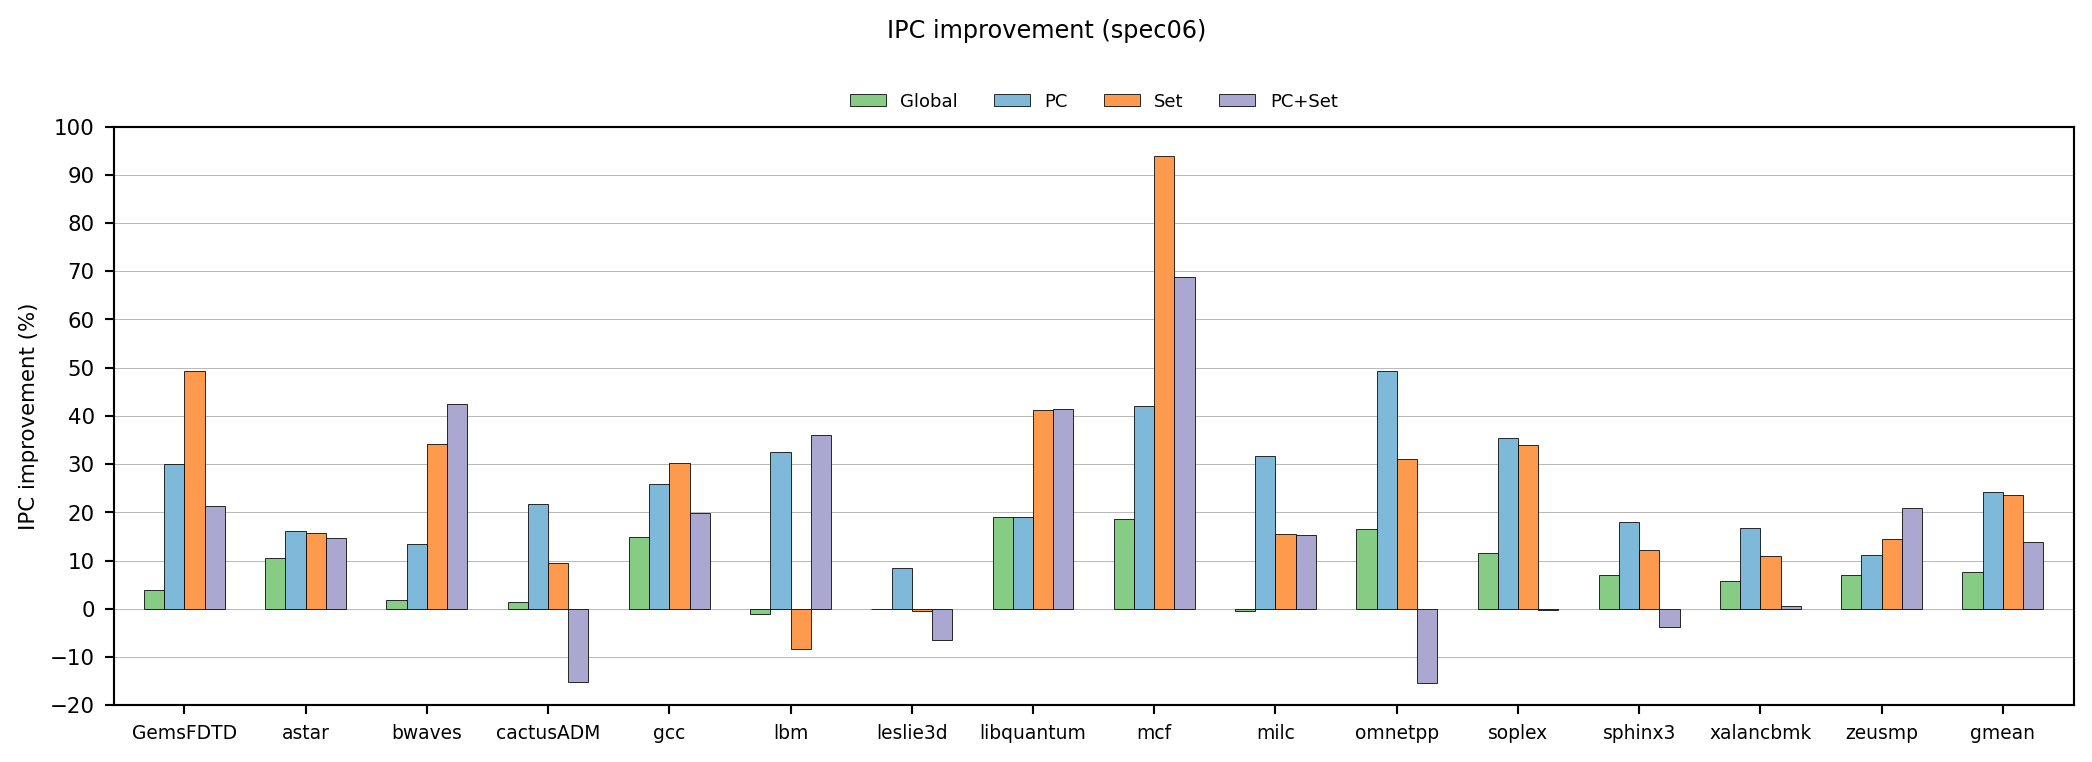

In [9]:
plot.plot_benchmark_statistic(
    stream_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 100),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("stream/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [10]:
plot.get_benchmark_table(stream_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Global,31.470718,7.286269,1.705352,-0.238652,16.477379,1.349400,0.585259,1.123925,1.725863,6.402370
PC,32.953392,14.478535,26.184986,12.620362,51.613910,4.759730,0.438261,3.520957,13.823443,16.864417
Set,34.204725,24.071873,15.955444,-14.131998,37.268363,2.449744,0.686821,5.262177,9.397547,11.683397
PC+Set,28.041150,17.877812,-20.140235,4.365815,-9.474127,-0.619394,-0.251503,-2.072072,-4.719762,0.578800


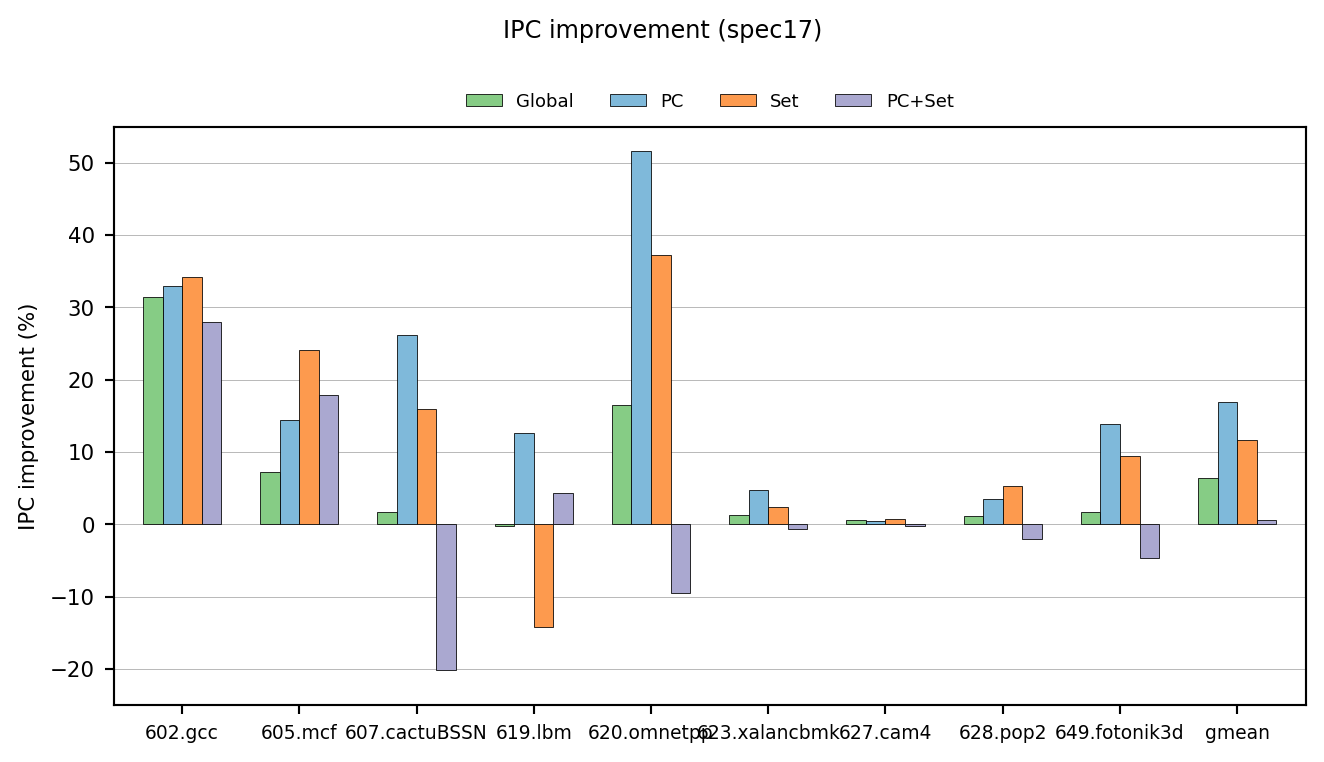

In [11]:
plot.plot_benchmark_statistic(
    stream_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-25, 55),
    ytick_distance=10,
    dpi=192, figsize=(7, 4))
plt.savefig("stream/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [12]:
plot.get_benchmark_table(stream_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

,bc,bfs,cc,pr,sssp,tc,gmean
Global,10.933846,12.842038,14.193416,-0.232455,10.621689,5.763673,8.907309
PC,28.329302,19.403075,19.859588,-0.187042,24.650510,7.220698,16.108039
Set,35.726024,19.478626,23.515190,-0.041209,27.717579,5.623374,18.009663
PC+Set,27.147719,13.117242,21.095256,0.107486,26.138778,3.879947,14.763002


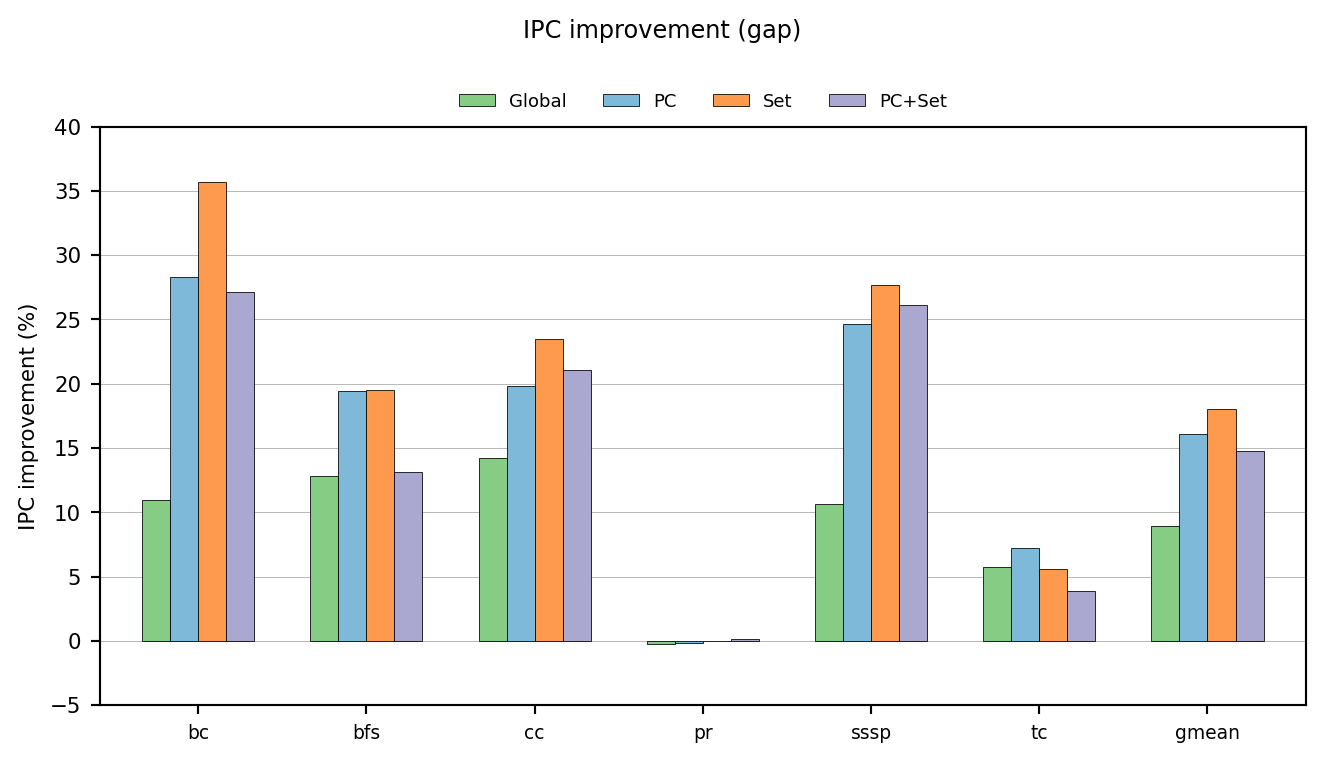

In [13]:
plot.plot_benchmark_statistic(
    stream_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("stream/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### cloudsuite

In [14]:
plot.get_benchmark_table(stream_df, "cloudsuite", "cpu.gmean.ipc_improvement", add_mean=True)

,cassandra,classifcation,cloud9,nutch,gmean
Global,13.845641,2.849928,7.498715,1.484004,6.311517
PC,26.508540,8.598323,22.147951,10.214207,16.618294
Set,27.747208,8.098148,23.450719,15.531854,18.465327
PC+Set,0.583707,0.432568,8.042979,-2.685158,1.518329


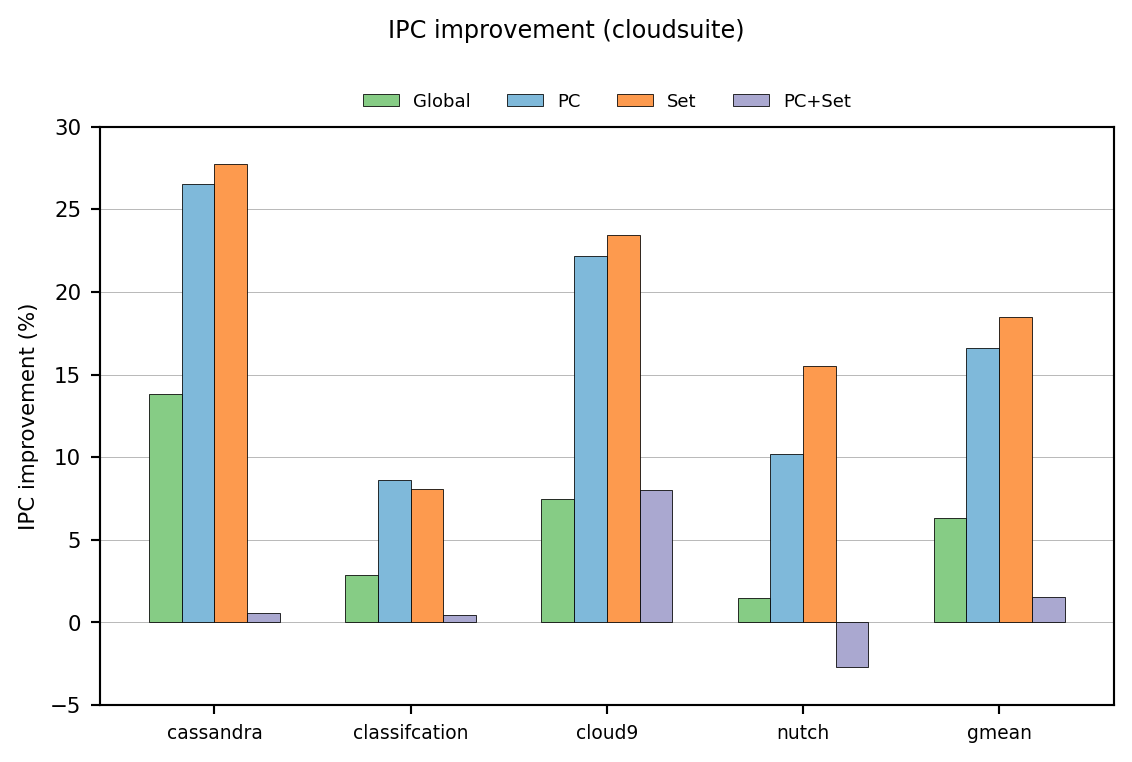

In [15]:
plot.plot_benchmark_statistic(
    stream_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 30),
    ytick_distance=5,
    dpi=192, figsize=(6, 4))
plt.savefig("stream/ipc_improvement__cloudsuite.png", dpi=dpi, bbox_inches="tight")

## Access, no cold misses

In [16]:
stream_nocold_df = {
    # Single global stream
    "Global": studies["sr_oracle_nocold"]["sr_oracle_global_cache_1"],
    # PC-localized stream
    "PC": studies["sr_oracle_nocold"]["sr_oracle_pc_cache_1"],
    # Set-localized stream
    "Set": studies["sr_oracle_nocold"]["sr_oracle_global_set_1"],
    # PC+Set-localized stream
    "PC+Set": studies["sr_oracle_nocold"]["sr_oracle_pc_set_1"],
    # Perfect
    # "Perfect": studies["perfect"]["llc_perfect_nocold"],
}

stream_nocold_colors = defaultdict(lambda: None, {
    "Global": colormaps["Greens"](0.45),
    "PC": colormaps["Blues"](0.45),
    "Set": colormaps["Oranges"](0.45),
    "PC+Set": colormaps["Purples"](0.45),
    "Perfect": colormaps["Reds"](0.45),
})

stream_nocold_hatches = defaultdict(lambda: None, {})
stream_nocold_legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
stream_nocold_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [17]:
plot.get_suite_table(
    stream_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_pc_set_1, mix pr: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


,spec06,spec17,cloudsuite,gap,gmean
Global,5.631265,4.123791,4.133226,7.438511,5.322931
PC,13.367452,7.913859,10.368422,12.681393,11.062044
Set,11.081351,5.074986,10.651533,13.754777,10.094822
PC+Set,3.505713,0.125593,0.290900,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_pc_set_1, mix pr: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


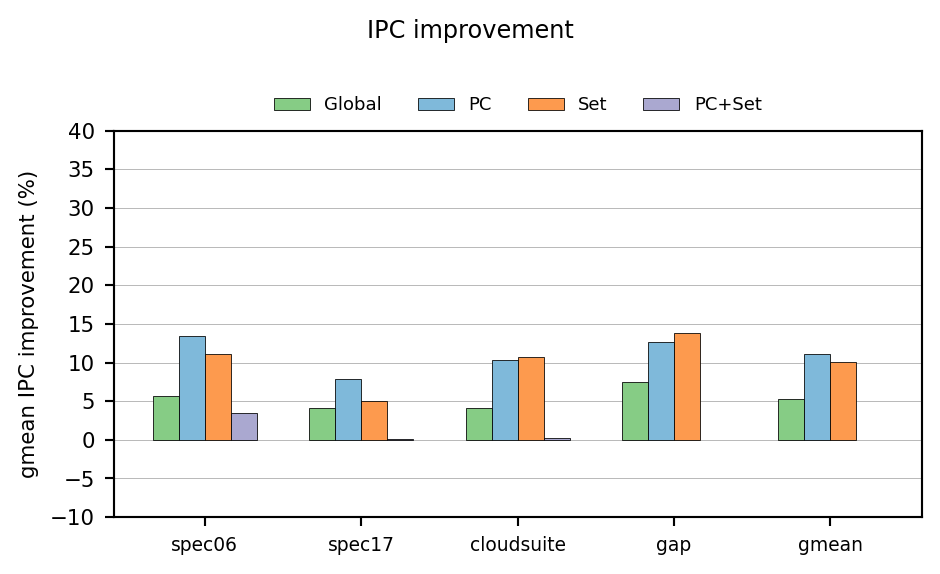

In [39]:
plot.plot_suite_statistic(
    stream_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-10, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("stream_nocold/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [18]:
plot.get_benchmark_table(stream_nocold_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Global,0.237405,8.770211,0.523754,1.991040,11.963983,-0.834154,0.227933,17.419733,11.820506,-0.173186,14.142163,10.569055,6.577151,3.533932,0.173120,5.631265
PC,3.069129,13.284603,1.122567,7.676226,20.655807,0.031017,6.359760,17.273814,26.640937,12.502072,40.172487,32.269972,16.366384,11.294838,0.284961,13.367452
Set,-0.547124,12.777262,0.546115,8.126618,25.445341,-5.000048,-3.229963,36.618570,33.419963,-1.401308,24.539551,30.246282,9.927227,7.236083,0.101622,11.081351
PC+Set,-0.155144,12.437260,1.277176,-4.422579,17.994026,0.087537,-5.466460,35.257110,23.341248,0.976616,-13.597430,-1.284348,-3.966689,-0.578579,0.747022,3.505713


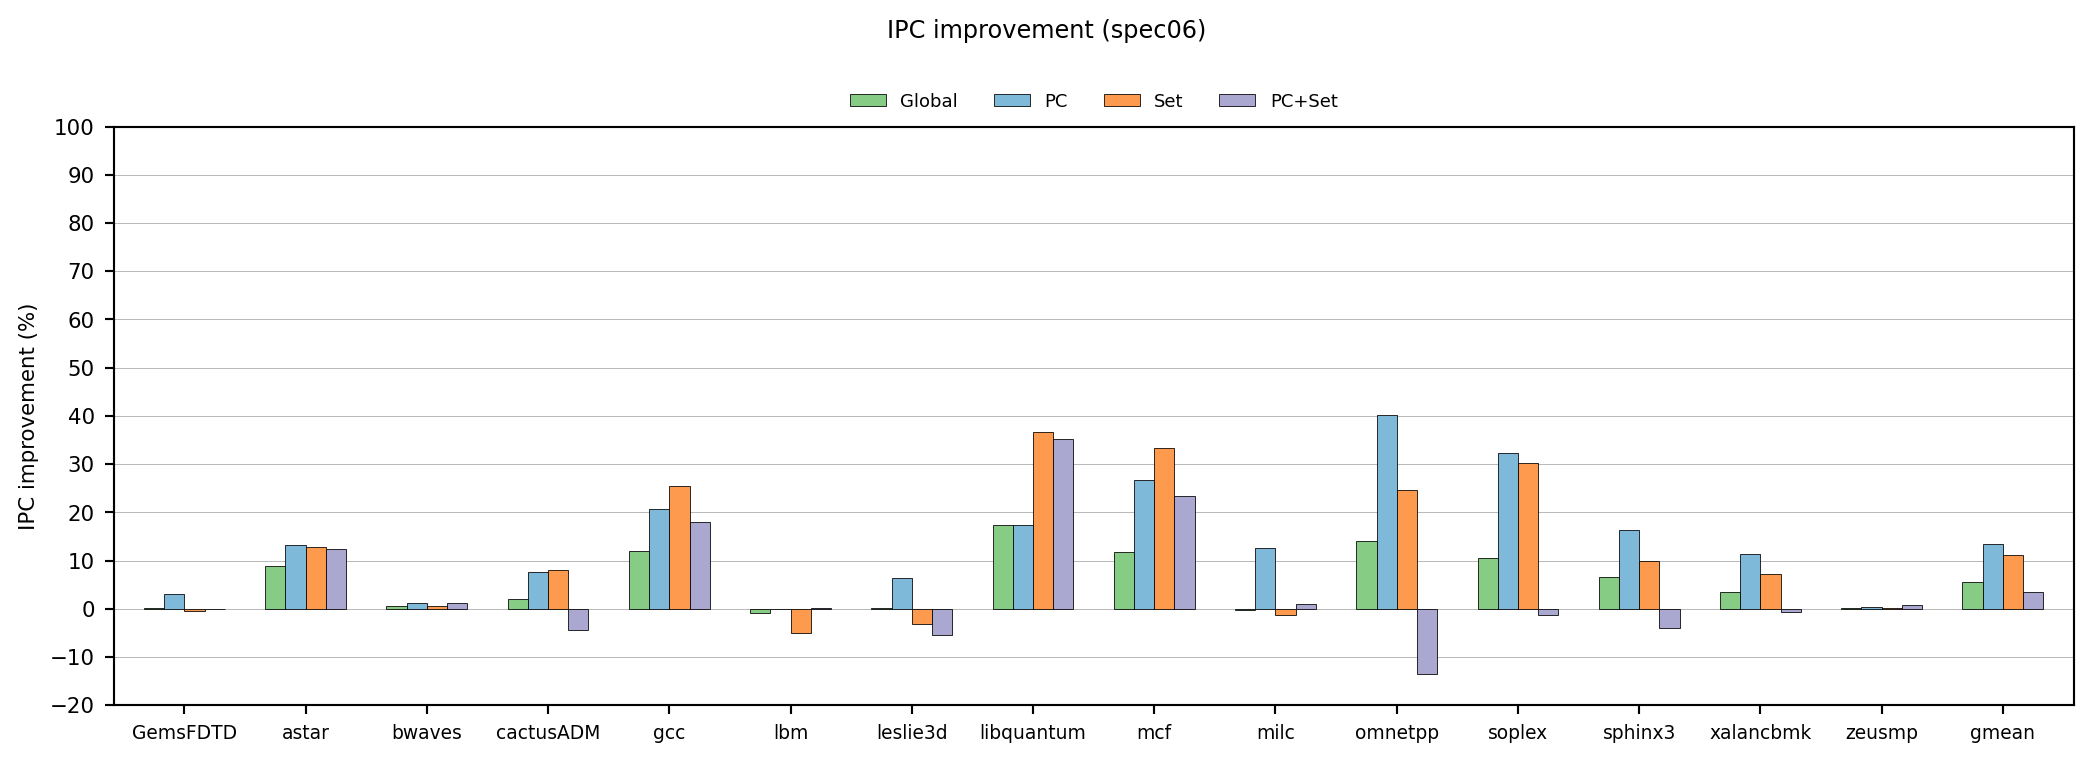

In [19]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 100),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("stream_nocold/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [20]:
plot.get_benchmark_table(stream_nocold_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Global,18.656010,2.803809,1.119505,-0.286848,12.410582,1.165552,0.311088,1.027295,1.492953,4.123791
PC,19.575080,5.370314,7.066170,0.026066,36.510432,4.011438,0.218257,3.226677,0.134756,7.913859
Set,17.086520,7.759498,4.907253,-10.584561,25.259538,1.980454,0.270550,3.334564,-0.329453,5.074986
PC+Set,14.511738,6.477151,-9.669956,0.011539,-7.455884,-0.826199,-0.148635,-1.613577,1.831516,0.125593


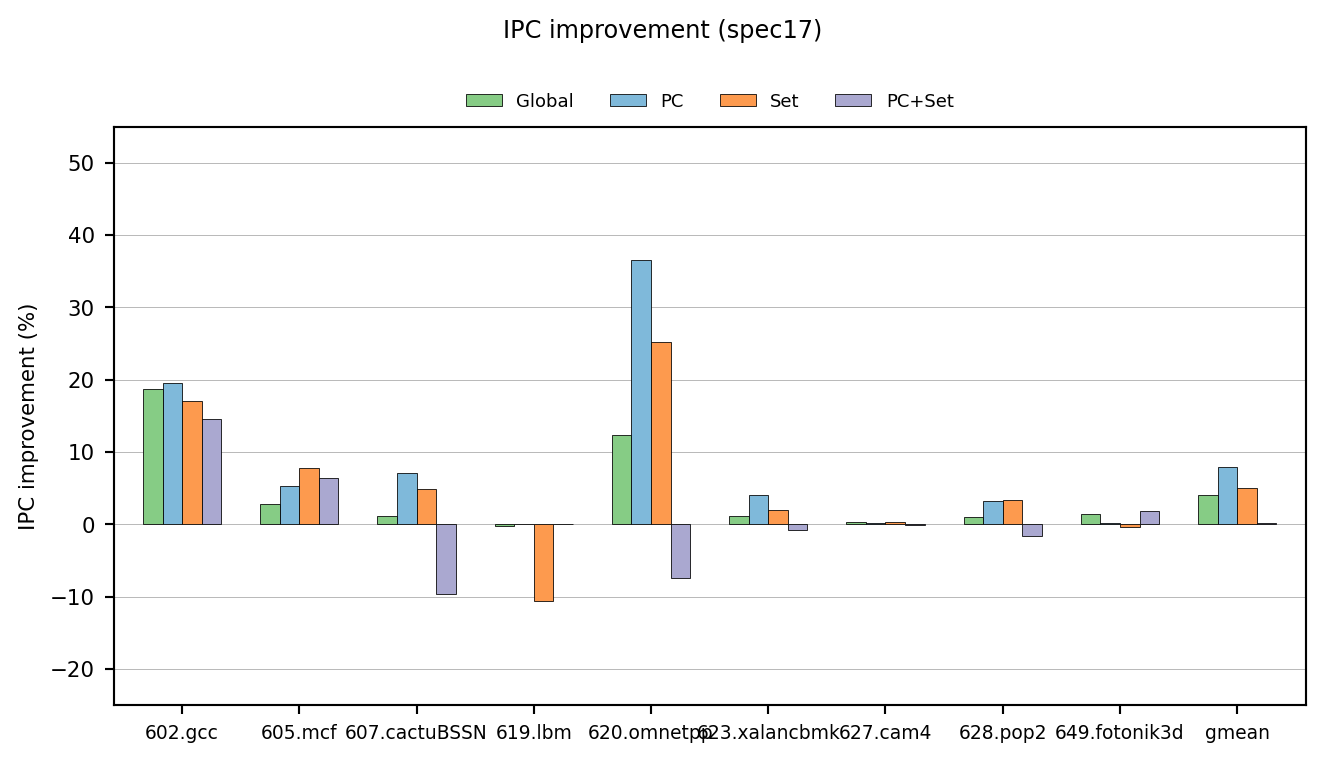

In [21]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-25, 55),
    ytick_distance=10,
    dpi=192, figsize=(7, 4))
plt.savefig("stream_nocold/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [22]:
plot.get_benchmark_table(stream_nocold_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_pc_set_1, mix pr: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


,bc,bfs,cc,pr,sssp,tc,gmean
Global,8.897486,11.614878,11.834587,-0.205939,8.827741,4.183631,7.438511
PC,18.261270,17.873232,16.264399,-0.151836,20.250647,5.191648,12.681393
Set,23.731170,16.895383,20.101048,-0.077472,20.559366,3.545259,13.754777
PC+Set,13.978419,10.537341,18.019163,NaN,19.383465,2.475568,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_pc_set_1, mix pr: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


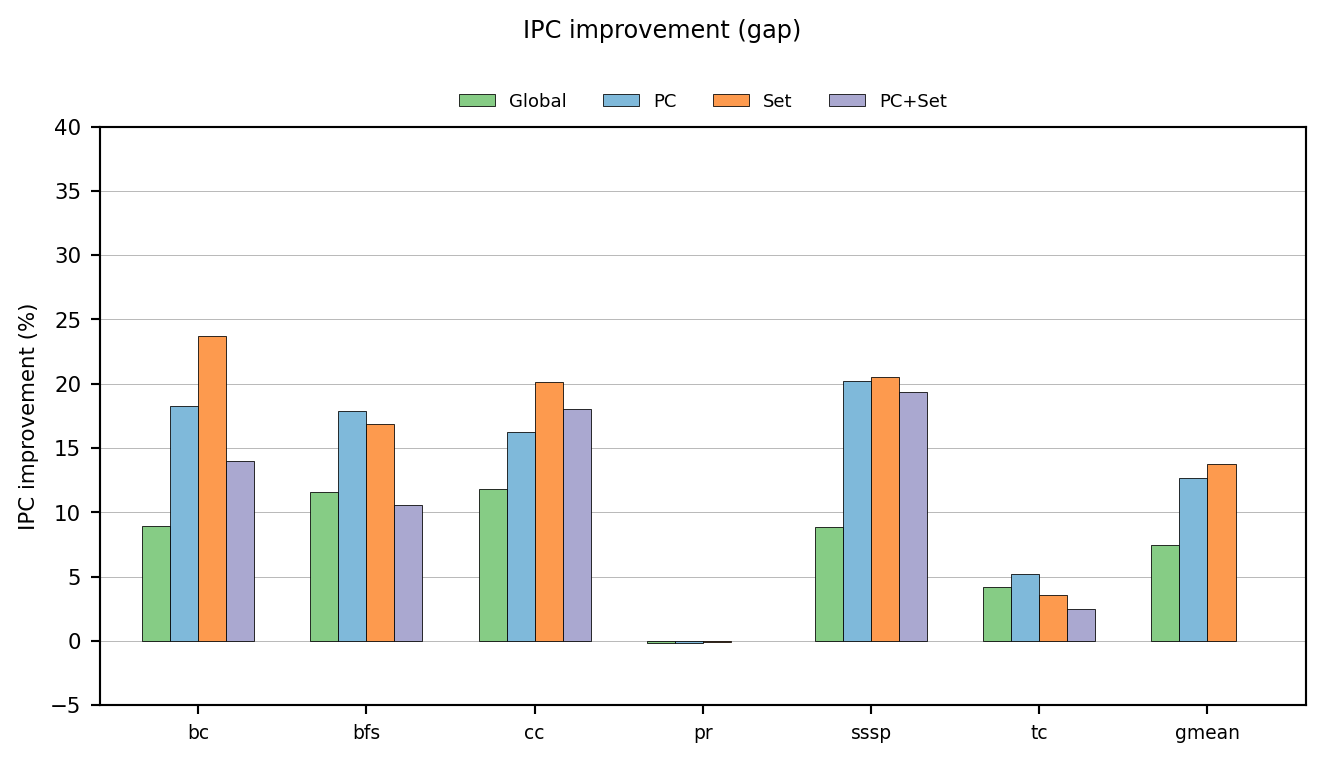

In [23]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("stream_nocold/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### cloudsuite

In [24]:
plot.get_benchmark_table(stream_nocold_df, "cloudsuite", "cpu.gmean.ipc_improvement", add_mean=True)

,cassandra,classifcation,cloud9,nutch,gmean
Global,8.371170,1.876841,5.552483,0.901961,4.133226
PC,14.522181,6.089229,15.917223,5.358713,10.368422
Set,14.858157,5.427233,15.491678,7.192498,10.651533
PC+Set,-0.411736,0.231881,4.993986,-3.468814,0.290900


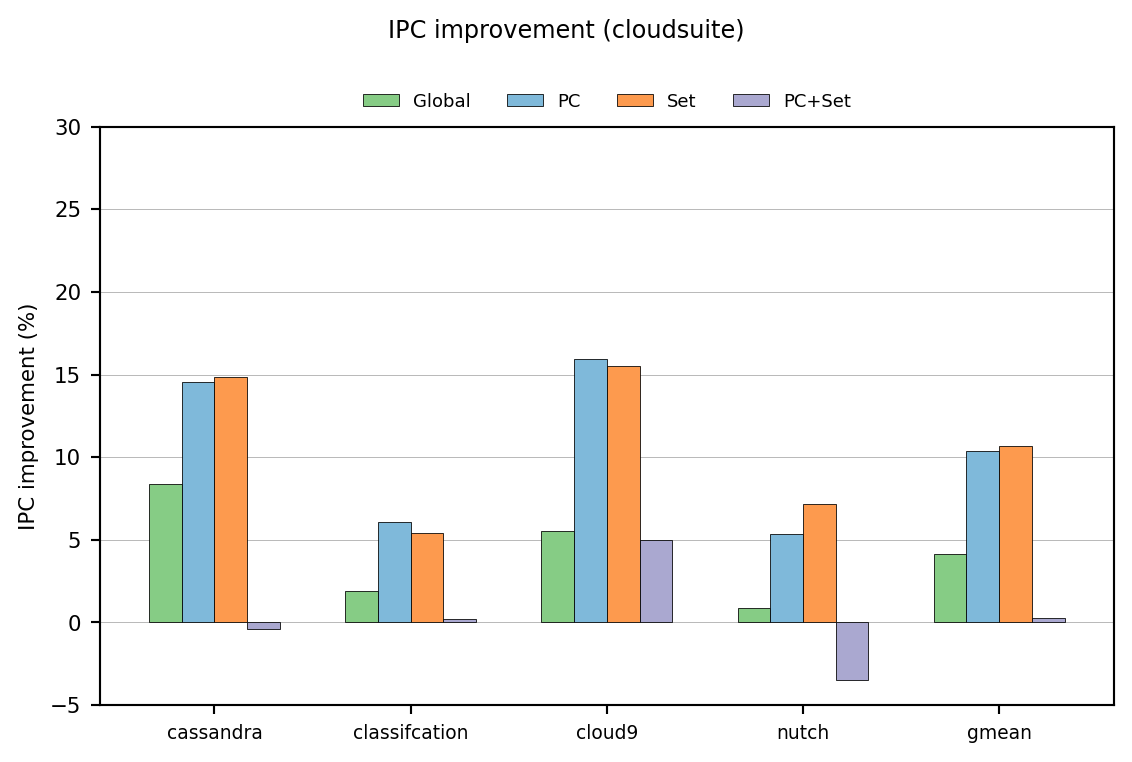

In [25]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 30),
    ytick_distance=5,
    dpi=192, figsize=(6, 4))
plt.savefig("stream_nocold/ipc_improvement__cloudsuite.png", dpi=dpi, bbox_inches="tight")

# Lookahead

## Access, all misses

In [26]:
lookahead_df = {
    # Single global stream
    "Global 1": studies["sr_oracle"]["sr_oracle_global_cache_1"],
    "Global 2": studies["sr_oracle"]["sr_oracle_global_cache_2"],
    "Global 3": studies["sr_oracle"]["sr_oracle_global_cache_3"],
    # PC-localized stream
    "PC 1": studies["sr_oracle"]["sr_oracle_pc_cache_1"],
    "PC 2": studies["sr_oracle"]["sr_oracle_pc_cache_2"],
    "PC 3": studies["sr_oracle"]["sr_oracle_pc_cache_3"],
    # Set-localized stream
    "Set 1": studies["sr_oracle"]["sr_oracle_global_set_1"],
    "Set 2": studies["sr_oracle"]["sr_oracle_global_set_2"],
    "Set 3": studies["sr_oracle"]["sr_oracle_global_set_3"],
    # PC+Set-localized stream
    #"PC+Set 1": studies["sr_oracle"]["sr_oracle_pc_set_1"],
    #"PC+Set 2": studies["sr_oracle"]["sr_oracle_pc_set_2"],
    #"PC+Set 3": studies["sr_oracle"]["sr_oracle_pc_set_3"],
}

# lookahead_df = {
#     # Lookahead 1 (same as "stream")
#     "Global 1": studies["sr_oracle"]["sr_oracle_global_cache_1"],
#     "PC 1": studies["sr_oracle"]["sr_oracle_pc_cache_1"],
#     "Set 1": studies["sr_oracle"]["sr_oracle_global_set_1"],
#     #"PC+Set 1": studies["sr_oracle"]["sr_oracle_pc_set_1"],
#     # Lookahead 2
#     "Global 2": studies["sr_oracle"]["sr_oracle_global_cache_2"],
#     "PC 2": studies["sr_oracle"]["sr_oracle_pc_cache_2"],
#     "Set 2": studies["sr_oracle"]["sr_oracle_global_set_2"],
#     #"PC+Set 2": studies["sr_oracle"]["sr_oracle_pc_set_2"],
#     # Lookahead 3
#     "Global 3": studies["sr_oracle"]["sr_oracle_global_cache_3"],
#     "PC 3": studies["sr_oracle"]["sr_oracle_pc_cache_3"],
#     "Set 3": studies["sr_oracle"]["sr_oracle_global_set_3"],
#     #"PC+Set 3": studies["sr_oracle"]["sr_oracle_pc_set_3"],
# }

lookahead_colors = defaultdict(lambda: None, {
    "Global 1": colormaps["Greens"](0.3),
    "Global 2": colormaps["Greens"](0.45),
    "Global 3": colormaps["Greens"](0.6),
    "PC 1": colormaps["Blues"](0.3),
    "PC 2": colormaps["Blues"](0.45),
    "PC 3": colormaps["Blues"](0.6),
    "Set 1": colormaps["Oranges"](0.3),
    "Set 2": colormaps["Oranges"](0.45),
    "Set 3": colormaps["Oranges"](0.6),
    "PC+Set 1": colormaps["Purples"](0.3),
    "PC+Set 2": colormaps["Purples"](0.45),
    "PC+Set 3": colormaps["Purples"](0.6),
})

lookahead_hatches = defaultdict(lambda: None, {})
lookahead_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
lookahead_legend_kwargs_wide = {
    "ncol": 9,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
lookahead_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [27]:
plot.get_suite_table(
    lookahead_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_global_set_2, mix nutch_phase0: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


,spec06,spec17,cloudsuite,gap,gmean
Global 1,7.555924,6.402370,6.311517,8.907309,7.289135
Global 2,12.489266,9.009346,10.836737,13.336893,11.405713
Global 3,16.009986,10.859011,14.022987,16.147471,14.239722
PC 1,24.272372,16.864417,16.618294,16.108039,18.419021
PC 2,32.007459,20.609654,18.976602,19.223117,22.588758
PC 3,37.053289,21.805885,19.601145,20.316860,24.495854
Set 1,23.549220,11.683397,18.465327,18.009663,17.851296
Set 2,21.555270,10.987937,NaN,16.292090,NaN
Set 3,19.466834,9.889675,13.923397,15.080308,14.539306


[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_global_set_2, mix nutch_phase0: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


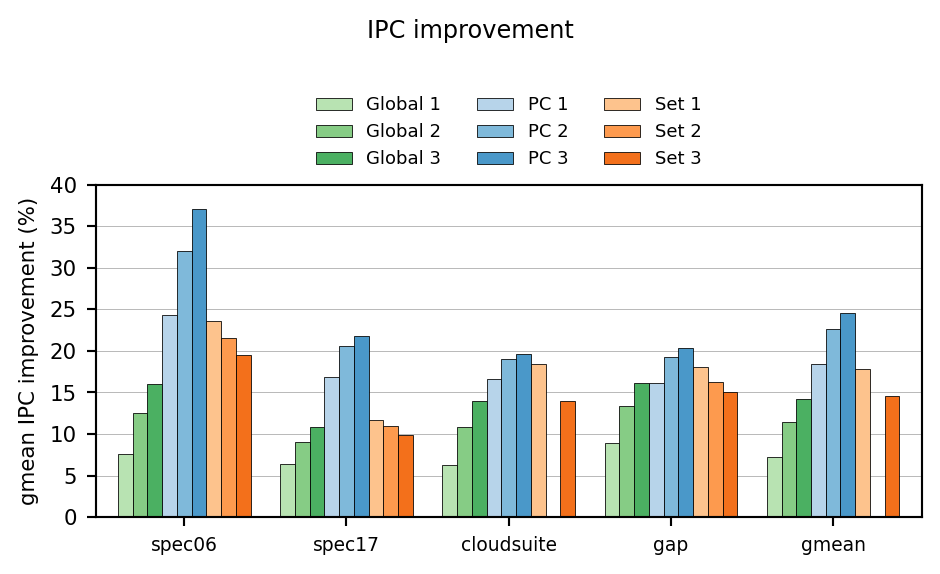

In [28]:
plot.plot_suite_statistic(
    lookahead_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=lookahead_colors,
    hatches=lookahead_hatches,
    legend_kwargs=lookahead_legend_kwargs,
    label_kwargs=lookahead_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("lookahead/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [29]:
plot.get_benchmark_table(lookahead_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Global 1,3.949441,10.443913,1.725694,1.381386,14.936233,-1.034393,-0.061229,19.043979,18.637315,-0.469869,16.551049,11.536966,6.980290,5.842962,7.078642,7.555924
Global 2,7.009696,15.406051,3.520651,2.615361,22.900585,-1.113867,1.464368,28.057053,36.285142,3.540072,25.514096,18.278754,12.916859,8.499585,9.907077,12.489266
Global 3,10.392364,17.061927,5.187457,4.159330,26.802253,-0.069496,2.339798,33.146272,49.882017,9.048426,30.846486,23.090489,17.259327,10.030640,11.737414,16.009986
PC 1,30.114007,16.213667,13.345422,21.736369,25.956744,32.590235,8.451543,19.065164,41.966335,31.665617,49.348601,35.411547,18.015224,16.728833,11.129414,24.272372
PC 2,47.708753,18.841150,18.911665,23.487939,31.638298,48.001834,13.354235,28.018003,62.045271,37.176940,61.768415,46.252504,23.488413,17.295741,16.030955,32.007459
PC 3,57.231074,19.594317,39.627518,23.749372,34.549607,55.575463,16.081527,33.135983,72.375776,39.538794,66.682310,50.698441,27.172268,17.132853,19.524326,37.053289
Set 1,49.216271,15.802372,34.065439,9.532410,30.145890,-8.273087,-0.551142,41.170261,93.990303,15.589667,31.071941,33.866505,12.175845,11.006625,14.500614,23.549220
Set 2,49.368492,14.288876,45.833301,6.904822,28.258653,-11.352540,-1.850793,38.882834,91.018527,13.037584,26.476983,24.439567,7.048997,9.481354,13.765475,21.555270
Set 3,45.819047,13.086159,44.455728,5.571737,27.022606,-12.181837,-3.260267,37.896243,86.493038,11.400517,24.462216,17.338876,3.600897,8.099383,13.335370,19.466834


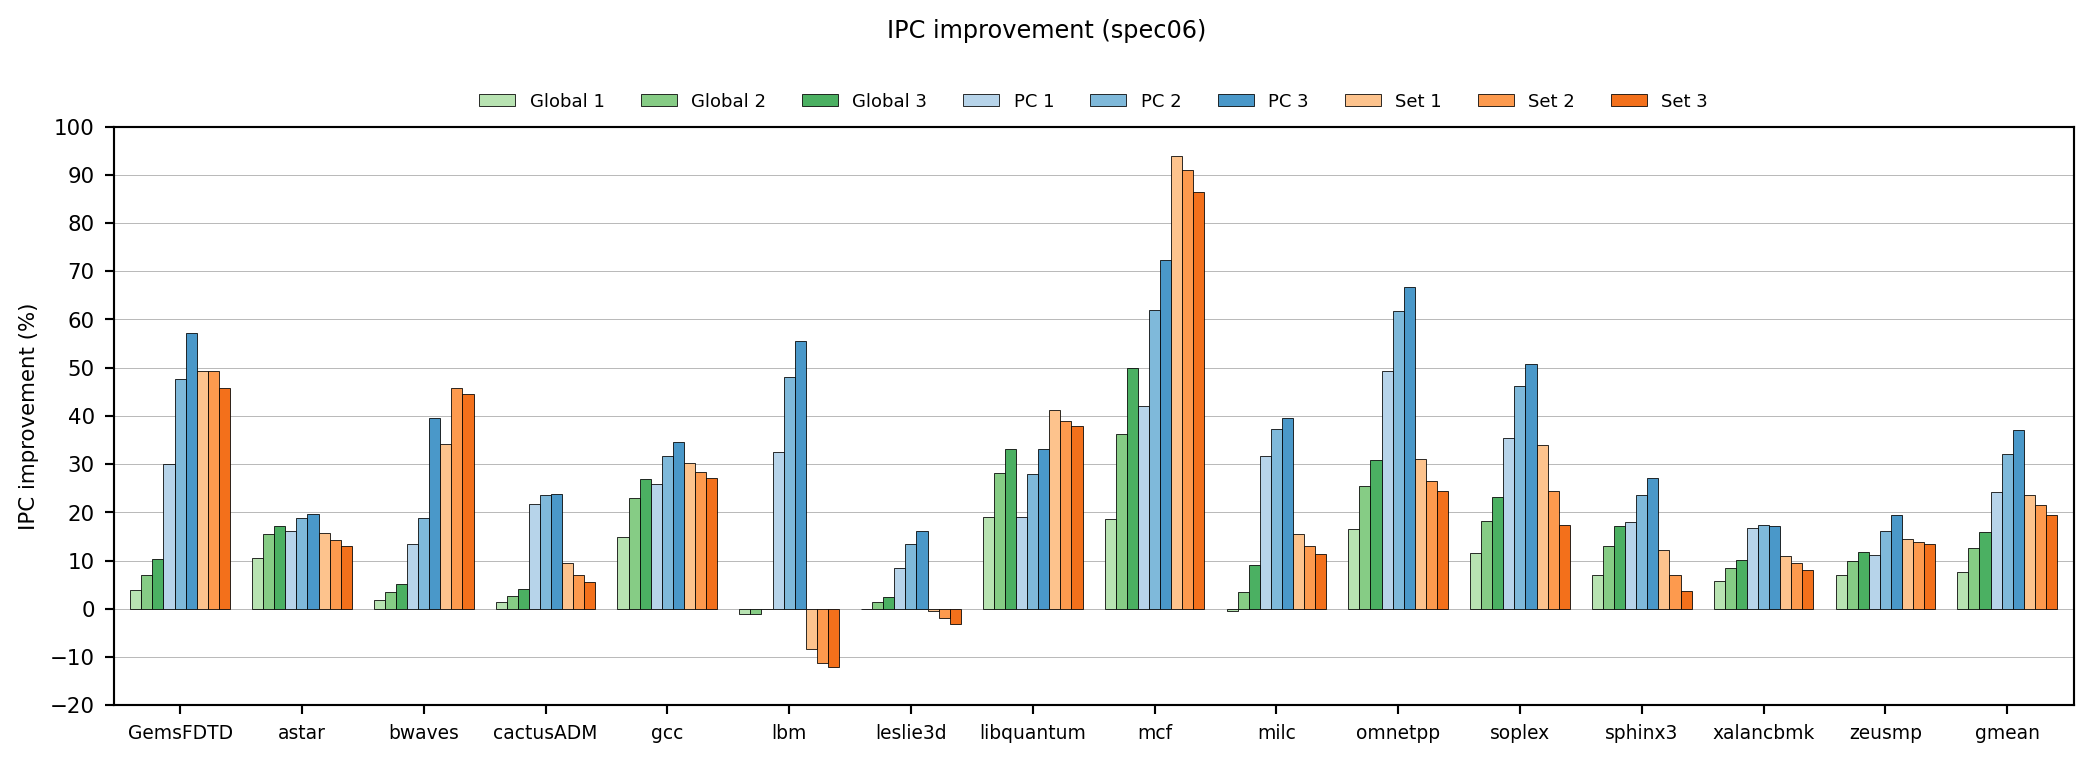

In [30]:
plot.plot_benchmark_statistic(
    lookahead_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=lookahead_colors,
    hatches=lookahead_hatches,
    legend_kwargs=lookahead_legend_kwargs_wide,
    label_kwargs=lookahead_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 100),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("lookahead/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [31]:
plot.get_benchmark_table(lookahead_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Global 1,31.470718,7.286269,1.705352,-0.238652,16.477379,1.349400,0.585259,1.123925,1.725863,6.402370
Global 2,36.298202,14.437521,2.869661,-0.001340,24.675229,2.479450,0.907408,2.553471,2.457366,9.009346
Global 3,37.277728,19.742619,3.814942,0.553669,30.146540,3.149166,1.035671,3.513091,4.969714,10.859011
PC 1,32.953392,14.478535,26.184986,12.620362,51.613910,4.759730,0.438261,3.520957,13.823443,16.864417
PC 2,36.557209,23.260234,25.771669,16.110934,61.834535,4.921245,0.517150,5.724928,21.756700,20.609654
PC 3,37.463720,26.770626,25.772878,17.195387,65.488543,4.896947,0.501711,7.302009,22.743386,21.805885
Set 1,34.204725,24.071873,15.955444,-14.131998,37.268363,2.449744,0.686821,5.262177,9.397547,11.683397
Set 2,33.230047,20.898811,24.711245,-17.498465,34.772117,1.555983,0.479305,3.900603,7.917009,10.987937
Set 3,32.570470,19.066848,25.540931,-19.225254,33.547118,0.601616,0.461547,3.055328,4.955115,9.889675


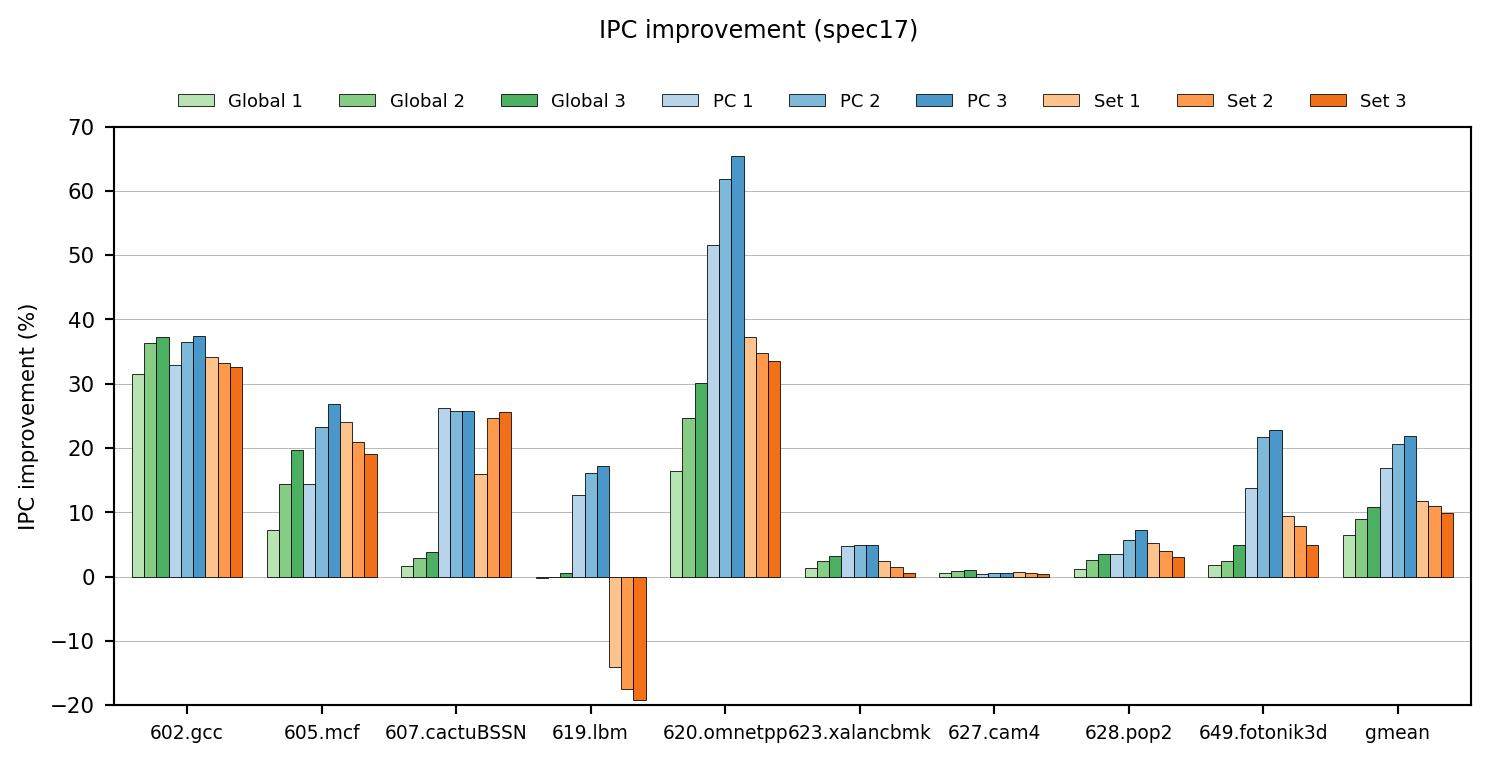

In [32]:
plot.plot_benchmark_statistic(
    lookahead_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=lookahead_colors,
    hatches=lookahead_hatches,
    legend_kwargs=lookahead_legend_kwargs_wide,
    label_kwargs=lookahead_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 70),
    ytick_distance=10,
    dpi=192, figsize=(8, 4))
plt.savefig("lookahead/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [33]:
plot.get_benchmark_table(lookahead_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

,bc,bfs,cc,pr,sssp,tc,gmean
Global 1,10.933846,12.842038,14.193416,-0.232455,10.621689,5.763673,8.907309
Global 2,18.896513,19.623179,18.320357,-0.182327,17.764858,7.142246,13.336893
Global 3,25.394833,21.686113,20.289749,-0.118446,24.076845,7.927778,16.147471
PC 1,28.329302,19.403075,19.859588,-0.187042,24.650510,7.220698,16.108039
PC 2,35.405489,22.705561,22.908212,0.016482,30.394677,7.832575,19.223117
PC 3,37.503136,23.798452,23.926355,0.084743,32.934005,8.084513,20.316860
Set 1,35.726024,19.478626,23.515190,-0.041209,27.717579,5.623374,18.009663
Set 2,34.468219,15.949816,22.177469,-0.053989,24.298546,4.517423,16.292090
Set 3,33.585312,13.089573,20.985893,-0.109691,22.424406,3.919902,15.080308


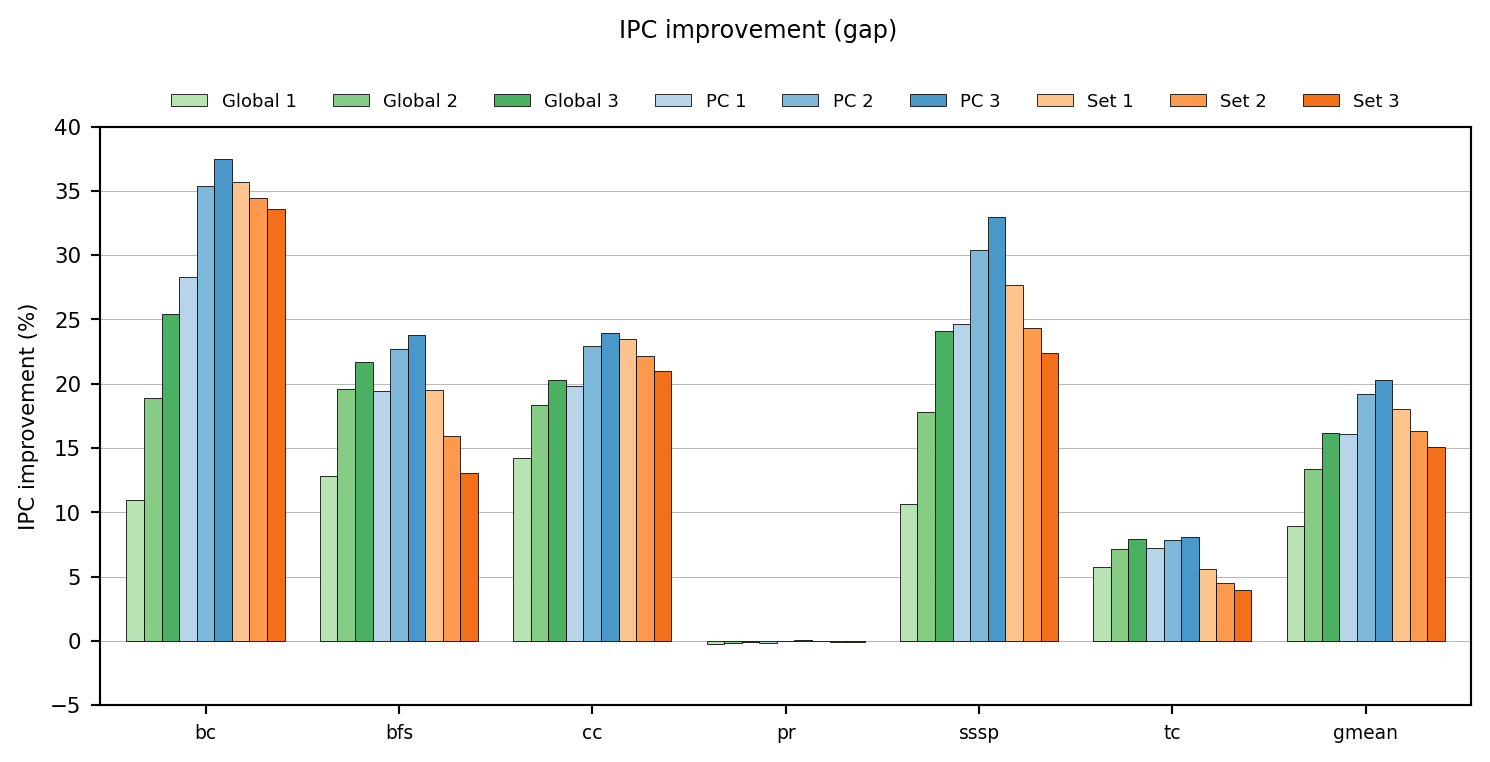

In [34]:
plot.plot_benchmark_statistic(
    lookahead_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=lookahead_colors,
    hatches=lookahead_hatches,
    legend_kwargs=lookahead_legend_kwargs_wide,
    label_kwargs=lookahead_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(8, 4))
plt.savefig("lookahead/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### cloudsuite

In [35]:
plot.get_benchmark_table(lookahead_df, "cloudsuite", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_global_set_2, mix nutch_phase0: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


,cassandra,classifcation,cloud9,nutch,gmean
Global 1,13.845641,2.849928,7.498715,1.484004,6.311517
Global 2,21.495126,4.673794,13.639826,4.425737,10.836737
Global 3,26.191999,6.074306,17.295507,7.657989,14.022987
PC 1,26.508540,8.598323,22.147951,10.214207,16.618294
PC 2,28.981582,8.741482,26.246634,13.162750,18.976602
PC 3,29.092308,8.742360,27.224548,14.570107,19.601145
Set 1,27.747208,8.098148,23.450719,15.531854,18.465327
Set 2,22.200549,6.986635,21.366646,NaN,NaN
Set 3,18.662573,6.153288,19.953756,11.478377,13.923397


[ipykernel_launcher][angrist-3] [WARNING] Experiment sr_oracle_global_set_2, mix nutch_phase0: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


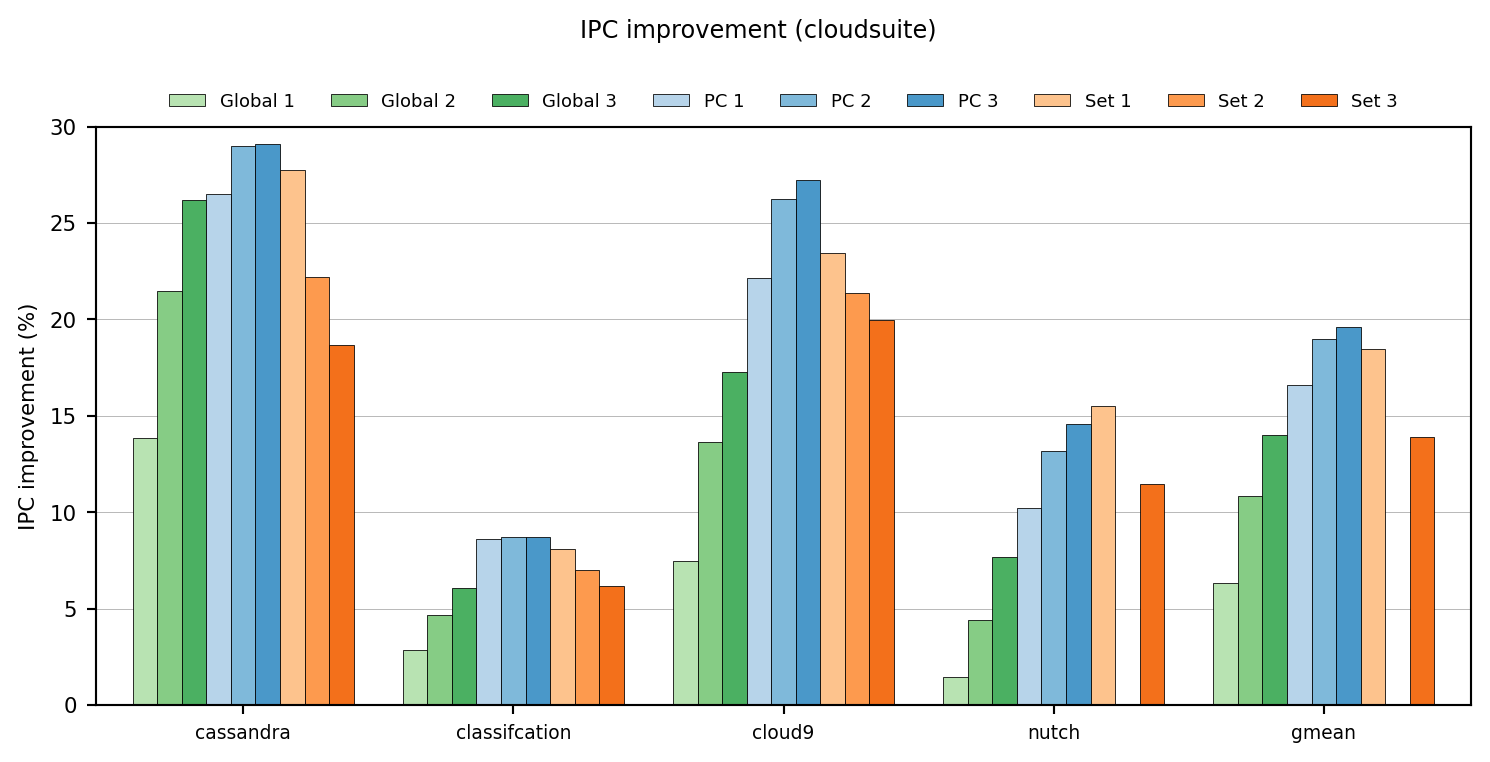

In [36]:
plot.plot_benchmark_statistic(
    lookahead_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=lookahead_colors,
    hatches=lookahead_hatches,
    legend_kwargs=lookahead_legend_kwargs_wide,
    label_kwargs=lookahead_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 30),
    ytick_distance=5,
    dpi=192, figsize=(8, 4))
plt.savefig("lookahead/ipc_improvement__cloudsuite.png", dpi=dpi, bbox_inches="tight")

# Perfect

In [52]:
perfect_df = {
    "Perfect": studies["perfect"]["llc_perfect"],
    "Perfect (except cold misses)": studies["perfect"]["llc_perfect_nocold"],
}

perfect_colors = defaultdict(lambda: None, {
    "Perfect": colormaps["Reds"](0.45),
    "Perfect (except cold misses)": colormaps["Reds"](0.7),
})

perfect_hatches = defaultdict(lambda: None, {})
perfect_legend_kwargs = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
perfect_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

### IPC improvement

In [50]:
plot.get_suite_table(
    perfect_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Perfect,119.160873,87.447791,44.246260,29.639333,66.483491
Perfect (except cold misses),54.149752,37.461923,42.157911,23.407052,38.854214


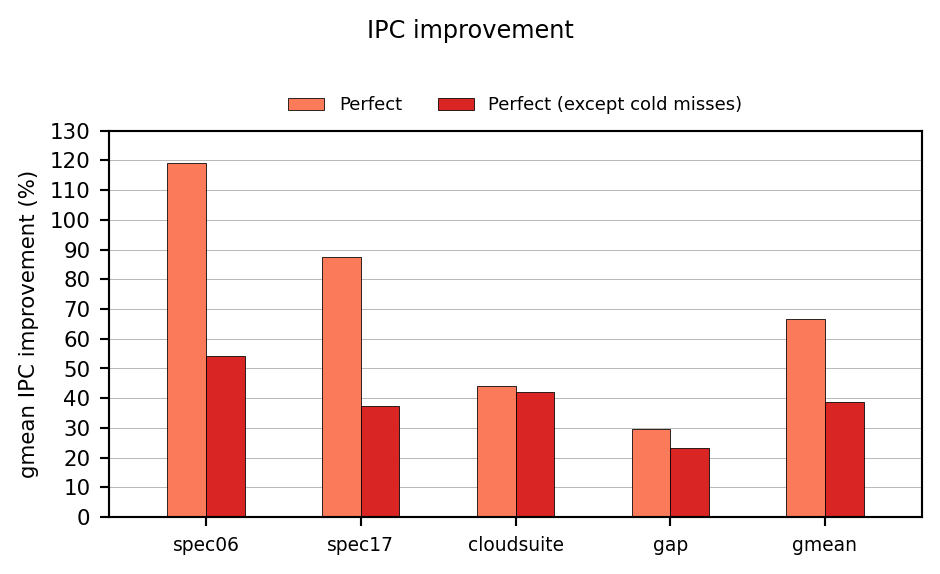

In [53]:
plot.plot_suite_statistic(
    perfect_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 130),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
plt.savefig("perfect/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

#### spec06

In [44]:
plot.get_benchmark_table(perfect_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Perfect,277.168666,39.567552,65.260745,65.066137,65.576658,330.099382,145.615383,171.772406,189.225819,270.756211,130.646019,146.573909,62.453738,32.359839,44.399004,119.160873
Perfect (except cold misses),40.234259,33.610516,4.335116,25.191042,46.186304,26.175517,103.946796,158.220634,63.571293,57.625737,119.925256,133.989742,56.891071,23.326153,8.042533,54.149752


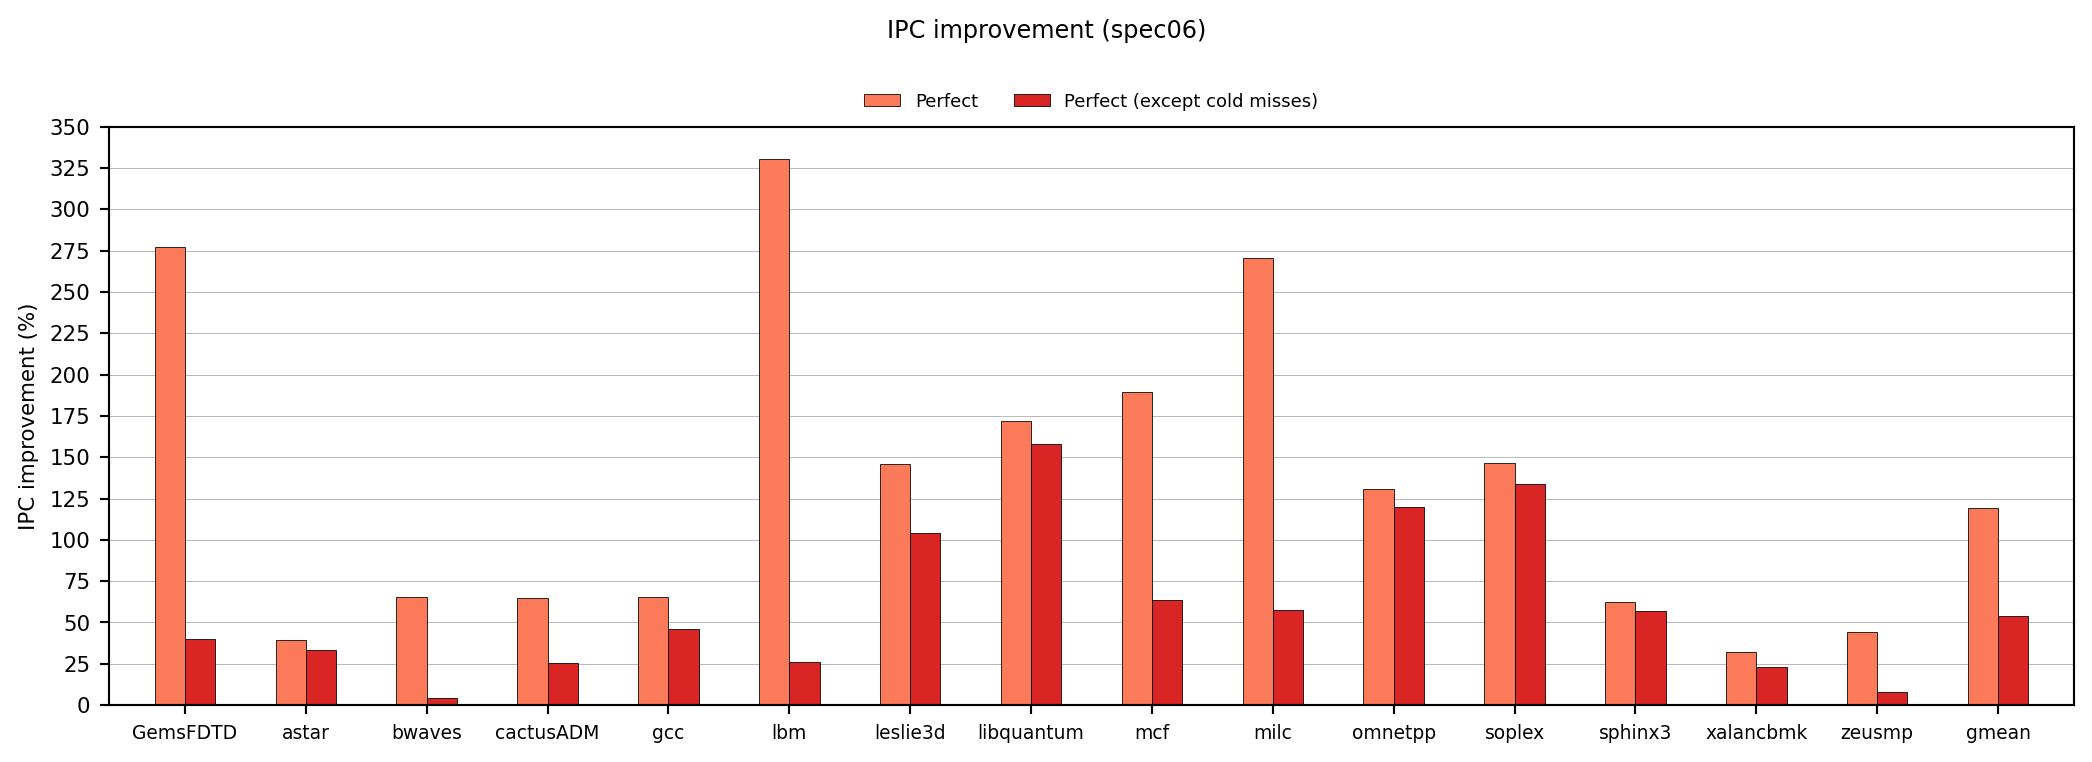

In [60]:
plot.plot_benchmark_statistic(
    perfect_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 350),
    ytick_distance=25,
    dpi=192, figsize=(11, 4))
plt.savefig("perfect/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

#### spec17

In [63]:
plot.get_benchmark_table(perfect_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Perfect,48.545020,50.432632,77.261032,632.815223,87.495058,10.823971,35.432677,42.185623,145.987115,87.447791
Perfect (except cold misses),33.377987,19.881963,18.121751,116.601330,75.351172,9.662470,31.848860,13.304109,49.115915,37.461923


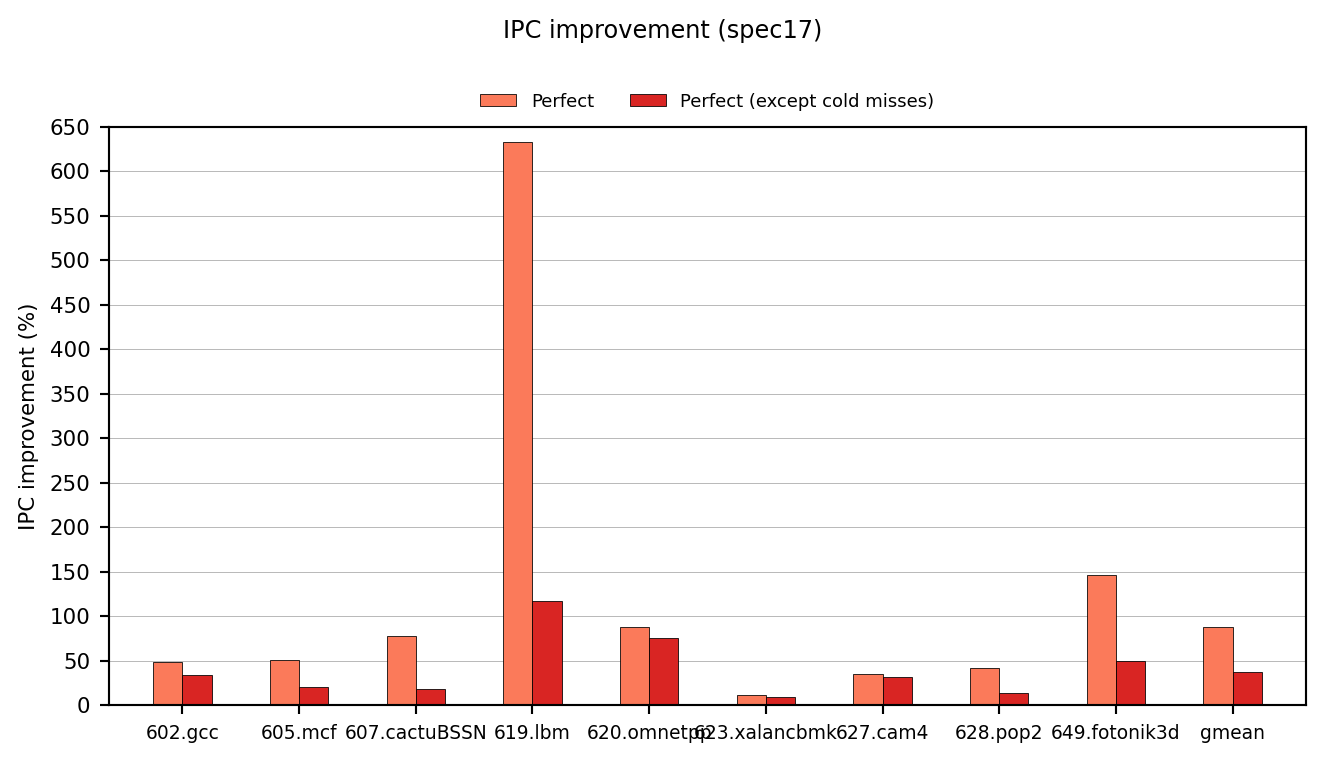

In [70]:
plot.plot_benchmark_statistic(
    perfect_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 650),
    ytick_distance=50,
    dpi=192, figsize=(7, 4))
plt.savefig("perfect/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

#### gap

In [62]:
plot.get_benchmark_table(perfect_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

,bc,bfs,cc,pr,sssp,tc,gmean
Perfect,52.063029,33.566963,27.346671,0.695108,54.253159,18.159329,29.639333
Perfect (except cold misses),28.624171,30.901751,26.571108,0.436155,40.976479,17.057839,23.407052


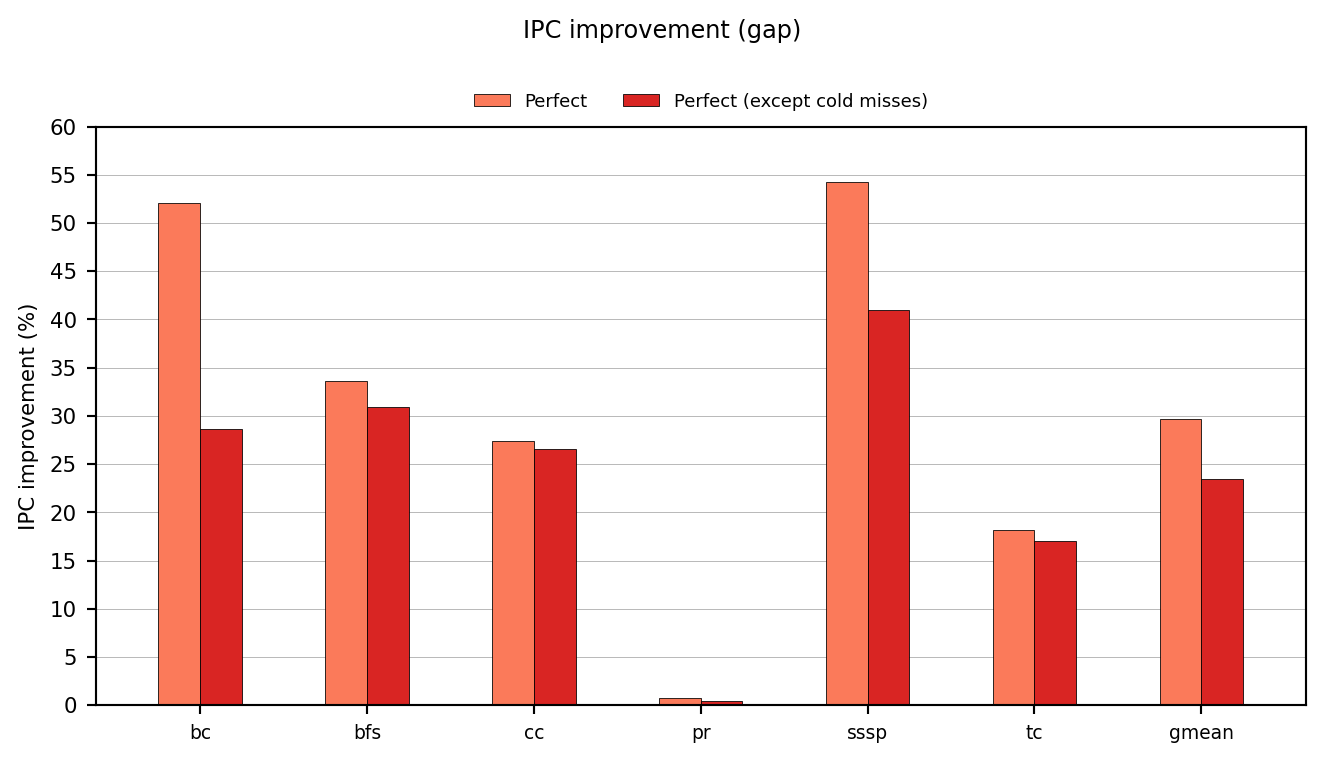

In [72]:
plot.plot_benchmark_statistic(
    perfect_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 60),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("perfect/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

#### cloudsuite

In [61]:
plot.get_benchmark_table(perfect_df, "cloudsuite", "cpu.gmean.ipc_improvement", add_mean=True)

,cassandra,classifcation,cloud9,nutch,gmean
Perfect,84.249045,17.349883,48.033756,35.260060,44.246260
Perfect (except cold misses),82.427629,16.402112,43.833075,33.713081,42.157911


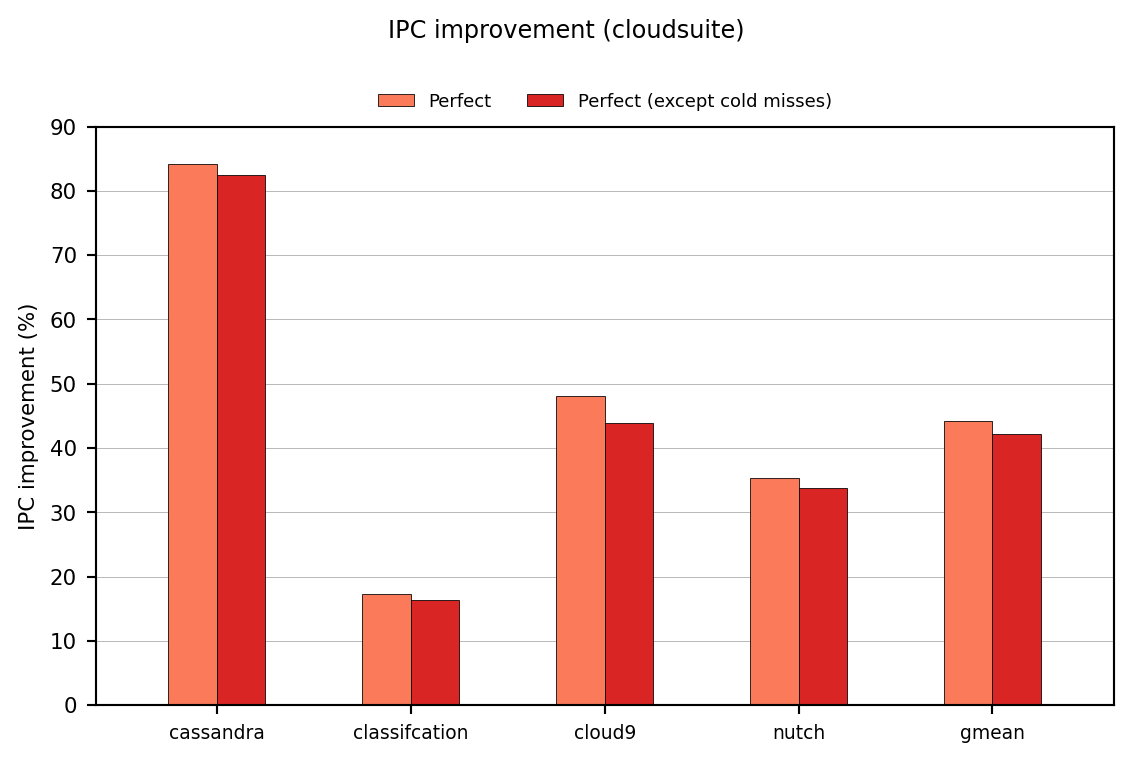

In [75]:
plot.plot_benchmark_statistic(
    perfect_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(6, 4))
plt.savefig("perfect/ipc_improvement__cloudsuite.png", dpi=dpi, bbox_inches="tight")